In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
Gfile = 'kepler_dr2_4arcsec.fits' # from http://gaia-kepler.fun, thanks to M. Bedell
data = Table.read(Gfile, format='fits')

In [15]:
df = data.to_pandas()
df.shape

(241989, 61)

In [16]:
ok = np.where(np.isfinite(df[u'parallax']) & # this is basically the same as the TGAS file...
              (df[u'parallax_error'] < 0.1) &
              np.isfinite(df[u'bp_rp']) & 
              (df[u'phot_bp_mean_flux_error']/df[u'phot_bp_mean_flux'] < 0.01) & 
              (df[u'phot_rp_mean_flux_error']/df[u'phot_rp_mean_flux'] < 0.01) & 
              (df[u'phot_g_mean_flux_error']/df[u'phot_g_mean_flux'] < 0.01))[0]



In [38]:
# superflare stars from Shibayama+2013
ffile = 'J_ApJS_209_5_stars.dat'
flare = pd.read_table(ffile, delimiter='|', skiprows=5, names=('KIC','Teff','logg','Rad','Kp','Prot'))
print(flare.shape)
flare_kic = np.array(flare['KIC'].values, dtype='float')

(279, 6)


## Quick Question:
Do the superflare G dwarfs fall along the normal main sequence?

In [42]:
# x = np.zeros_like(flare_kic, dtype='int')

x = np.array([],dtype='int')
for k in range(len(flare_kic)):
    tmp = np.where(df[u'kepid'] == flare_kic[k])[0]
#     print(np.size(tmp))
    if np.size(tmp) == 1:
        x = np.append(x,tmp)

In [50]:
isonames = ('Zini','Age','Mini','Mass','logL','logTe','logg','label','McoreTP',
            'C_O','period0','period1','pmode','Mloss','tau1m','X','Y','Xc','Xn','Xo',
            'Cexcess','Z','mbolmag','Gmag','G_BPmag','G_RPmag','B_Tmag','V_Tmag',
            'Jmag','Hmag','Ksmag')

# output382961170123.dat # age = 5e9
iso_file = 'iso/output382961170123.dat'
iso = pd.read_table(iso_file, delim_whitespace=True, header=None, comment='#', names=isonames)

iok = np.where((iso['label'] < 4))[0][::-1]

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


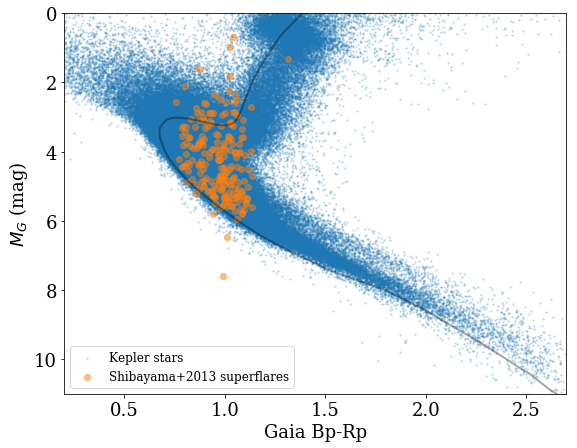

In [54]:
plt.figure(figsize=(9,7))
# cm = plt.cm.get_cmap('Spectral')

plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] + 5. * np.log10(df[u'parallax'].values[ok]/1000.)  + 5, 
            alpha=0.2, s=2, label='Kepler stars')

plt.scatter(df[u'bp_rp'].values[x],
            df[u'phot_g_mean_mag'].values[x] + 5. * np.log10(df[u'parallax'].values[x]/1000.)  + 5,
            label='Shibayama+2013 superflares', alpha=0.5)

plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], iso['Gmag'].values[iok], c='k', lw=2, alpha=0.35)

plt.legend(fontsize=12)
plt.ylim(11,0)
plt.xlim(.2,2.7)
plt.xlabel('Gaia Bp-Rp')
plt.ylabel('$M_G$ (mag)')
plt.savefig('flare_cmd.png', dpi=300, bbox_inches='tight', pad_inches=0.25)
plt.show()


/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in log10


Text(0,0.5,u'$M_G$ (mag)')

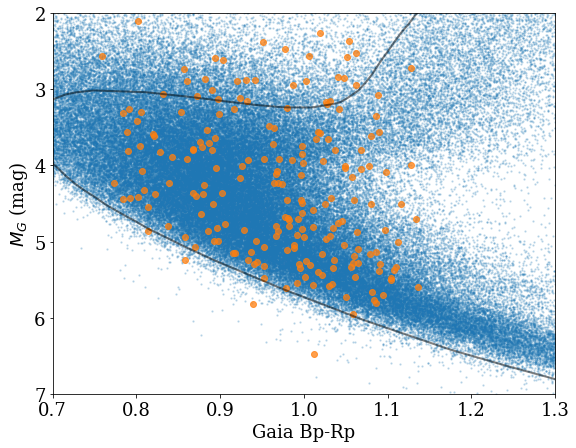

In [52]:
plt.figure(figsize=(9,7))
# cm = plt.cm.get_cmap('Spectral')

plt.scatter(df[u'bp_rp'].values[ok], 
            df[u'phot_g_mean_mag'].values[ok] + 5. * np.log10(df[u'parallax'].values[ok]/1000.)  + 5, 
            alpha=0.2, s=2, label='Kepler stars')

plt.scatter(df[u'bp_rp'].values[x],
            df[u'phot_g_mean_mag'].values[x] + 5. * np.log10(df[u'parallax'].values[x]/1000.)  + 5,
            label='Shibayama+2013 superflares', alpha=0.75)

plt.plot(iso['G_BPmag'].values[iok] - iso['G_RPmag'].values[iok], iso['Gmag'].values[iok], c='k', lw=2, alpha=0.5)

# plt.legend(fontsize=12)
plt.ylim(7,2)
plt.xlim(.7,1.3)
plt.xlabel('Gaia Bp-Rp')
plt.ylabel('$M_G$ (mag)')
# plt.title('Gaia DR2 - McQuillan (2014)')
# plt.text(4000, 1, 'N=894', fontsize=12)

